# Netflix Data Analysis
This notebook explores Netflix content metadata (movies and TV shows).

Objectives:",
- Load and inspect the dataset
- Clean and extract date features
- Visualize monthly and yearly release trends
- Analyze top countries and genres

### Import Required Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load The Dataset

In [2]:
data = pd.read_csv('netflix1.csv')

In [3]:

data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:

data.size

87900

### Description of the Dataset

In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
data.isnull().value_counts()

show_id  type   title  director  country  date_added  release_year  rating  duration  listed_in
False    False  False  False     False    False       False         False   False     False        8790
Name: count, dtype: int64

In [7]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Plot content added over the years

In [8]:

data['release_year']=pd.to_datetime(data['release_year'])
data['Years']=data['release_year'].dt.year

<Axes: xlabel='release_year'>

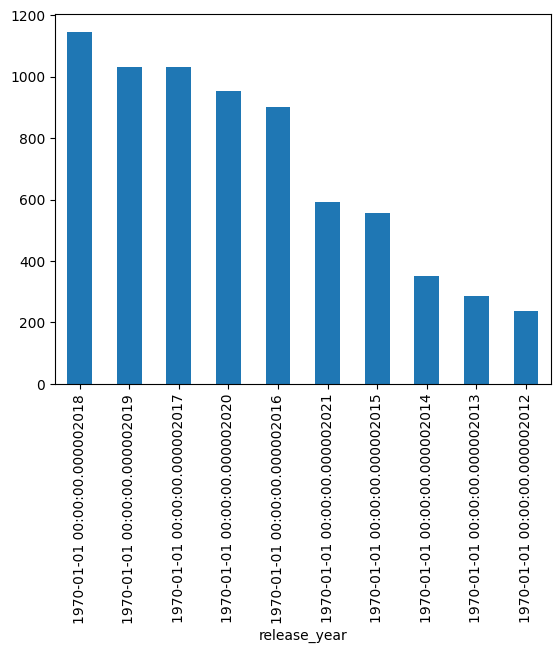

In [9]:


year = data.release_year.value_counts()
year[:10].plot(kind = 'bar')
     

<Axes: xlabel='country'>

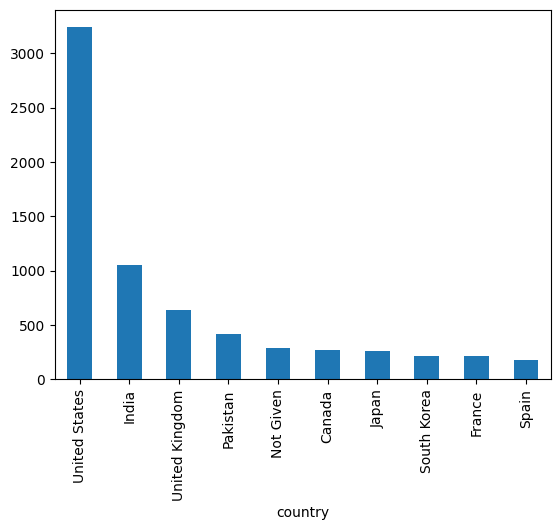

In [10]:
top_10_country = data.country.value_counts()
top_10_country[:10].plot(kind = 'bar')

<Axes: ylabel='count'>

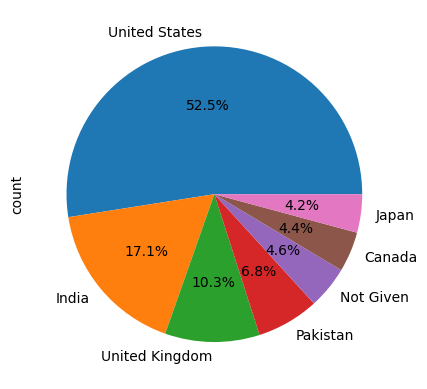

In [11]:

data_country = data.country.value_counts()
data_country[:7].plot(kind = 'pie',autopct ='%1.1f%%')

In [12]:
data.rating.value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

<Axes: xlabel='listed_in'>

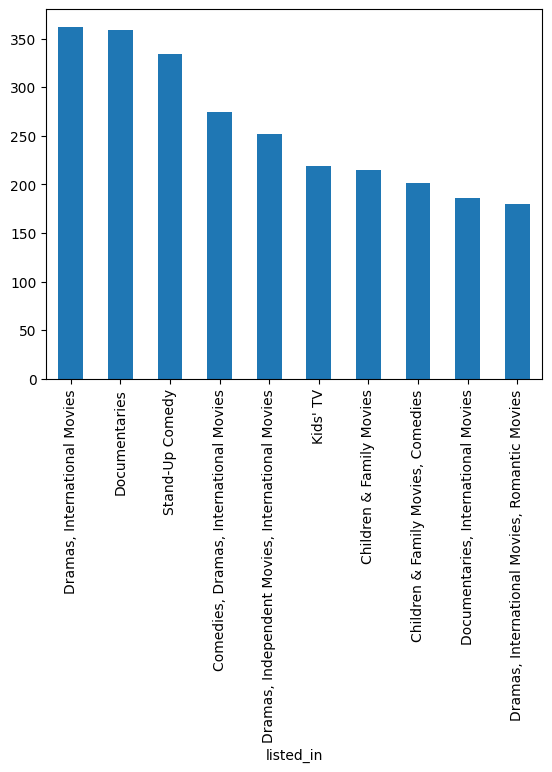

In [13]:
top_10_types = data.listed_in.value_counts()
top_10_types[:10].plot(kind = 'bar')

<Axes: ylabel='count'>

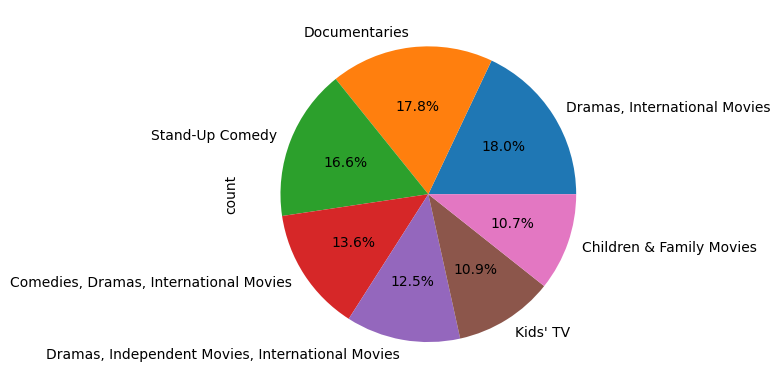

In [14]:
data_list= data.listed_in.value_counts()
data_list[:7].plot(kind = 'pie',autopct ='%1.1f%%')
     

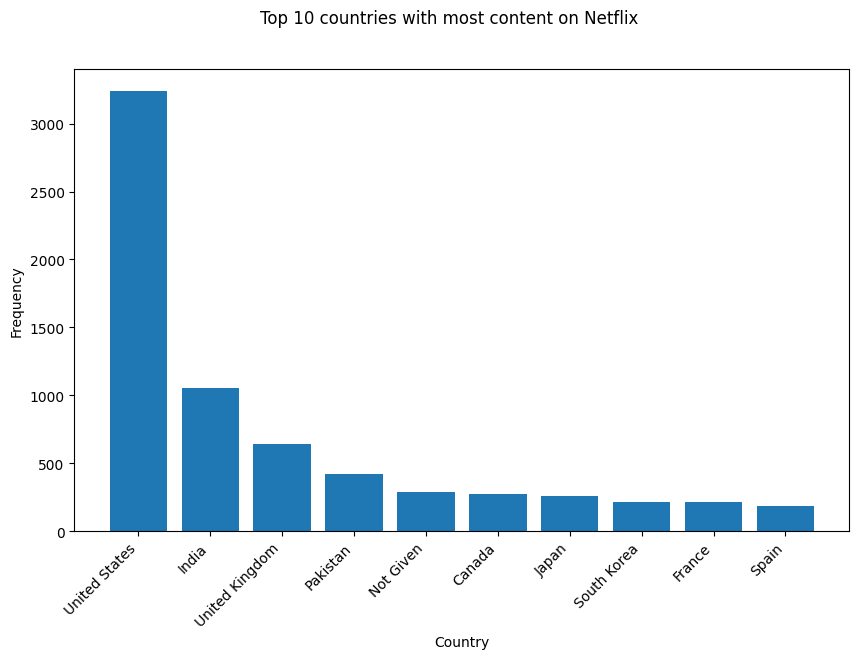

In [15]:
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'],
top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

### Data cleaning & feature engineering
Convert `date_added` to datetime and extract `year`, `month`, and `day` features.
Handle malformed or missing dates by coercing errors to `NaT`.

In [16]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day

### Monthly release trends
Compare the number of titles added each month for Movies vs TV Shows.
We aggregate by the extracted `month` feature and plot both series on the same axes.

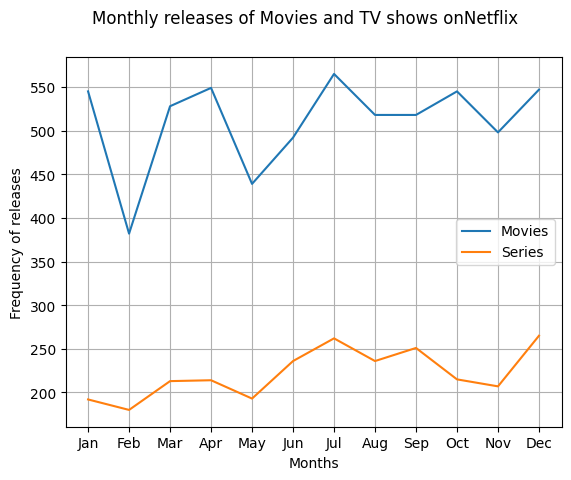

In [17]:
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index,
monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index,
monthly_series_release.values, label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows onNetflix")
plt.show()

### Yearly release trends
Visualize how many titles were added each year for Movies and TV Shows.
This helps identify growth patterns over time.

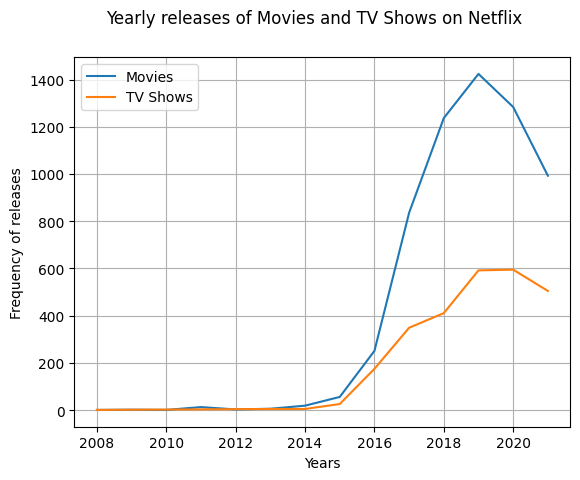

In [18]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index,
yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index,
yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

### Top genres
Compare the most common genres for Movies and TV Shows.
We compute the top 10 `listed_in` categories for each content type and visualize them.

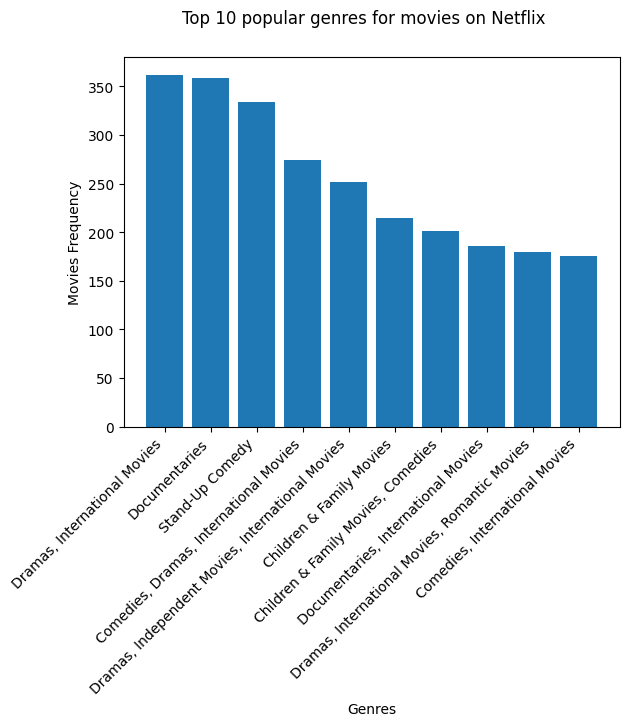

In [19]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

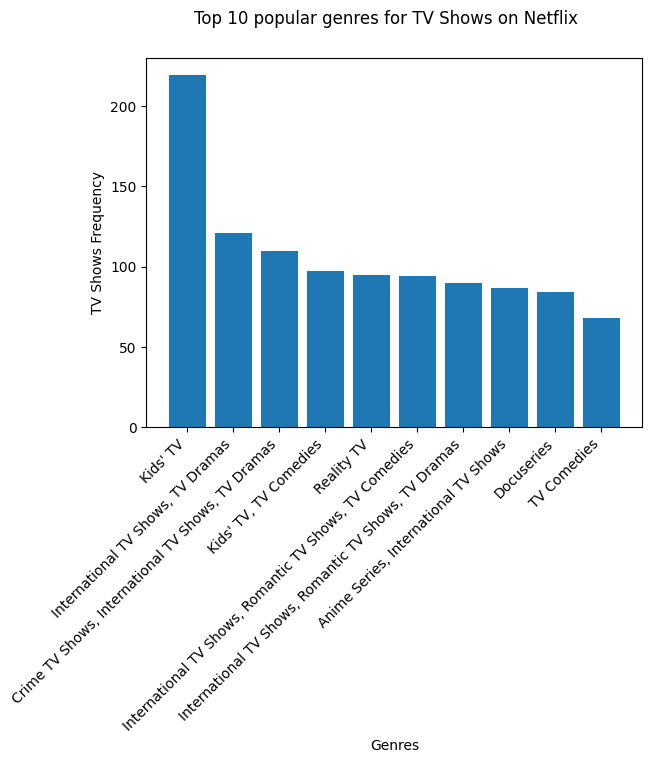

In [20]:

plt.bar(popular_series_genre.index,popular_series_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()